# k-NN

## набор данных рукописных цифр UCI

Согласно описанию набора данных Digits1,
каждый образец содержит 64 признака (Number of Attributes), представляю-
щие изображение 8 × 8 со значениями пикселов в диапазоне 0–16 (Attribute
Information). Набор данных не содержит отсутствующих значений (Missing
Attribute Values).

Версия набора данных, поставляемая со scikit-learn,
содержит только 1797 тестовых образцов.

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
from sklearn.datasets import load_digits

In [16]:
digits = load_digits()

 - Массив target содержит метки изображений, то есть классы, указываю-
щие, какую цифру представляет каждое изображение. Массив называетсяtarget, потому что при прогнозировании вы стремитесь «попасть в цель» с выбором значений. 

In [17]:
digits.target[::100] # значения класса (цифры от 0 до 9)

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

-  Массив data содержит 1797 образца (изображения цифр), каждый из которых несет 64 признака (изображение 8х8) со значениями в диапазоне 0–16, представляющие интенсивности пикселов. С Matplotlib можно визуализировать интенсивности в оттенках серого от белого (0) до черного (16):

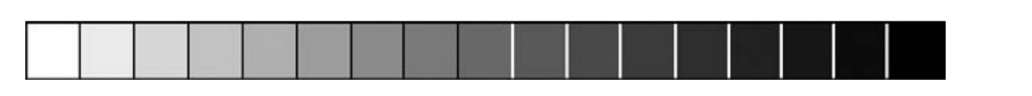

In [18]:
digits.data.shape # 1797 строк (образцов) и 64 столбцов (признаков)

(1797, 64)

In [19]:
digits.images[13] # массив 13го объекта (цифра 3)

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

# Подготовка данных для использования со scikit-learn

scikit-learn требуют, чтобы образцы хранились в двумерном массиве значений с плавающей точкой (или коллекции,
сходной с двумерным массивом, например списком списков или коллекцией
pandas DataFrame):
    
- каждая строка представляет один образец;
    

- каждый столбец заданной строки представляет один признак этого образца.

Для представления каждого образца в виде одной строки данных многомерные
данные (например, двумерный массив image из фрагмента) должны быть
преобразованы в одномерный массив.

Если вы работаете с данными, содержащими категорийные признаки (обычно
представленные в виде строк — скажем, 'spam' и 'not-spam'), то вам также придется провести предварительную обработку этих признаков и преобразовать их в числовые значения 

In [20]:
digits.data[13] # уже обработанные данные (строка - один образец)

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

# Изображение

<IPython.core.display.Javascript object>


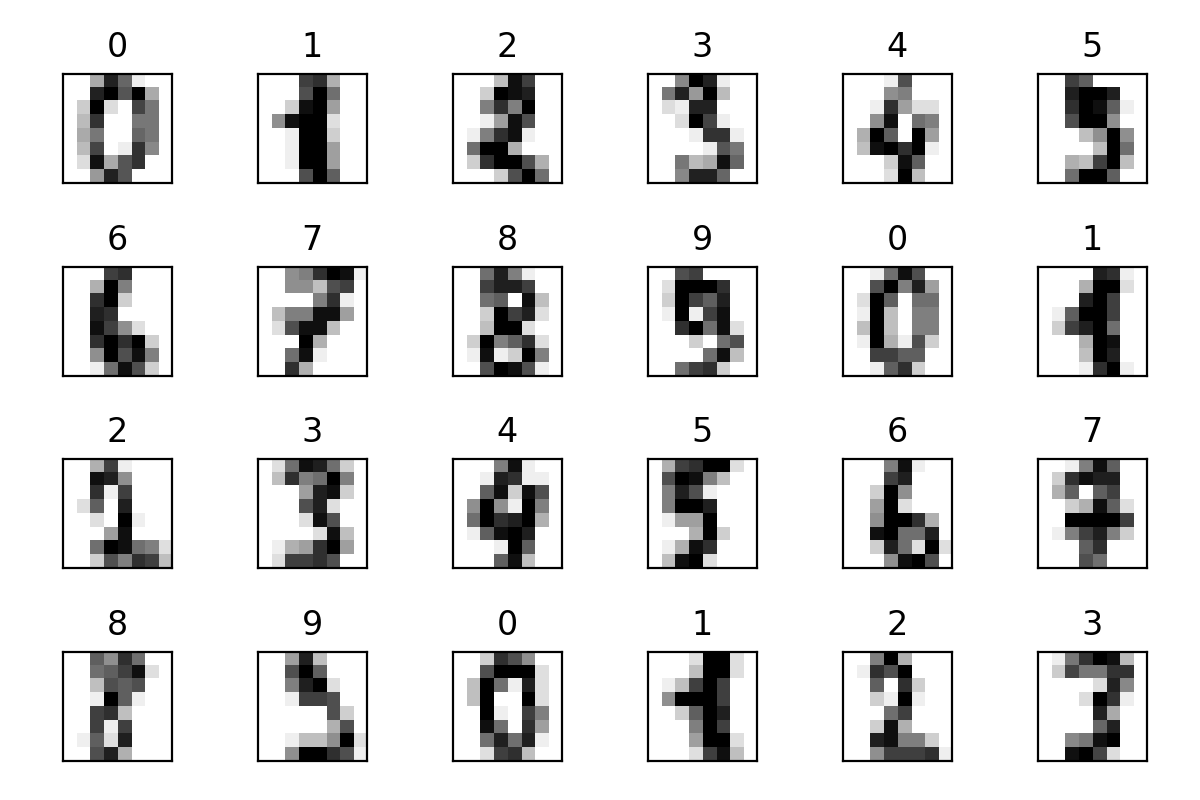

In [21]:
import matplotlib.pyplot as plt
%matplotlib notebook
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

In [22]:
# axes.ravel() - делает массив в строку одну

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r) #plt.cm.gray_r цвета серые
    axes.set_xticks([]) # Удаление делений на оси x
    axes.set_yticks([]) # Удаление делений на оси y
    axes.set_title(target) # вывода целевого значения над изображением
plt.tight_layout() # удаляет лишние поля у краев Figure

## Реализация метода

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state = 11)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [25]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [26]:
expected = y_test # ожидаемые

In [53]:
predicted = knn.predict(X = X_test)

## Метрики точности модели

In [28]:
# где предсказание модели было ошибочным
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
wrong 

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

In [29]:
#Метод score оценщика
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [30]:
# Матрица несоответствий
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]])

Правильные прогнозы находятся на главной диагонали, про-
ходящей от левого верхнего до правого нижнего угла. Ненулевые значения, не находящиеся на главной диагонали, обозначают ошибочные прогнозы

Каждая строка представляет один класс, то есть одну из цифр от 0 до 9.
Столбцы обозначают количество тестовых образцов, классифицированных
в соответствующий класс. Например, строка 0:

[45, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Теперь возьмем строку 8, представляющую результат для цифры 8:

[ 0, 1, 1, 2, 0, 0, 0, 0, 39, 1]

- 1 в столбце с индексом 1 означает, что одна цифра 8 была неправильно
классифицирована как 1.

- 1 в столбце с индексом 2 означает, что одна цифра 8 была неправильно
классифицирована как 2.

и тд


In [31]:
from sklearn.metrics import classification_report
print(classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



precision — точность, то есть общее количество точных прогнозов для
заданной цифры, разделенное на общее количество прогнозов для этой
цифры.

recall — отклик, то есть общее количество правильных прогнозов для
заданной цифры, разделенное на общее количество образцов, которые
должны были прогнозироваться как эта цифра.

f1-score — среднее значение точности и отклика;

support — количество образцов с заданным ожидаемым значением. Например, 50 образцов были снабжены меткой 4, а 38 образцов — меткой 5.

In [32]:
import pandas as pd

In [33]:
confusion_df = pd.DataFrame(confusion, index=range(10),
                            columns=range(10)) 
# преобразование матрицы несоотвестствий в дф
confusion_df

,0,1,2,3,4,5,6,7,8,9
0,45,0,0,0,0,0,0,0,0,0
1,0,45,0,0,0,0,0,0,0,0
2,0,0,54,0,0,0,0,0,0,0
3,0,0,0,42,0,1,0,1,0,0
4,0,0,0,0,49,0,0,1,0,0
5,0,0,0,0,0,38,0,0,0,0
6,0,0,0,0,0,0,42,0,0,0
7,0,0,0,0,0,0,0,45,0,0
8,0,1,1,2,0,0,0,0,39,1
9,0,0,0,0,1,0,0,0,1,41


In [34]:
import seaborn as sns

<IPython.core.display.Javascript object>


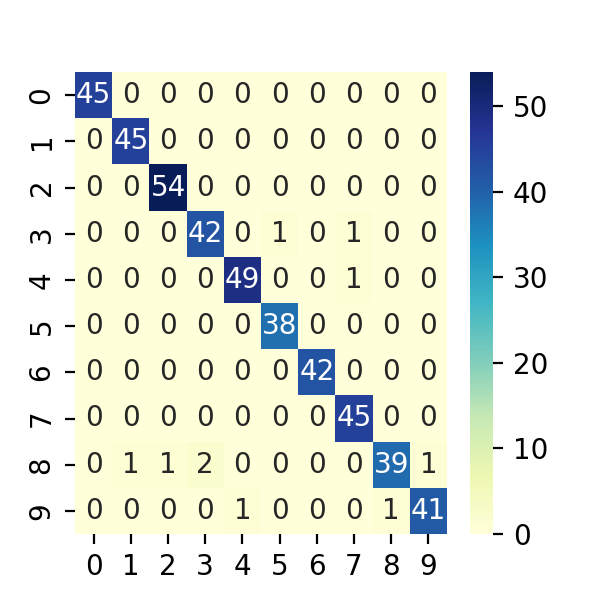

<AxesSubplot:>

In [41]:
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_df, annot=True, cmap='YlGnBu')

# Крос валидация

In [42]:
from sklearn.model_selection import KFold

In [44]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
# n_splits=10 - колво частей
# shuffle=True - перемешивание данных перед разбиением

In [45]:
from sklearn.model_selection import cross_val_score

In [56]:
scores = cross_val_score(estimator=knn, X=digits.data,
                         y=digits.target, cv=kfold)

# estimator=knn — оценщик, который вы хотите проверить;
# X=digits.data — образцы, используемые для обучения и тестирования;
# y=digits.target — прогнозы целевых значений для образцов;

# cv=kfold — генератор перекрестной проверки, определяющий способ 
#разбиения образцов и целевых значений для обучения и тестирования.

In [57]:
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98882682])

In [59]:
print(f'Mean accuracy: {scores.mean():.2%}') #средний показатель точности

Mean accuracy: 98.78%


In [60]:
print(f'Accuracy standard deviation: {scores.std():.2%}') # станд откл

Accuracy standard deviation: 0.74%


В среднем модель обеспечивала точность 98,74%, то есть даже больше, чем в предыдущем варианте, когда 75% данных использовалось для обучения,
а 25% — для тестирования.

# SVC и GaussianNB

In [61]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [62]:
estimators = {
    'KNeighborsClassifier': knn,
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()}

In [63]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
    X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' +
    f'mean accuracy={scores.mean():.2%}; ' +
    f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.78%; standard deviation=0.74%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


# Настройка гиперпараметров

In [64]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
        X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
        f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.78%; standard deviation=0.74%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.33%; standard deviation=0.90%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.83%; standard deviation=0.95%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%
